In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cereals.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7,5,320,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8,0,330,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14,8,?,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13,12,25,25,2,1.0,1.00,27.753301
73,WheatChex,R,C,100,3,1,230,3.0,17,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17,3,110,25,1,1.0,1.00,51.592193


Q1. Create a table with the 5-number summary of all the nutrient

In [3]:
df[["protein","fat","sodium","carbo","potass","vitamins","sugars","fiber"]].describe()


,protein,fat,sodium,vitamins,fiber
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,160.065789,28.289474,2.048684
std,1.089020,1.013159,84.318813,22.487813,2.219038
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,132.500000,25.000000,0.750000
50%,2.500000,1.000000,180.000000,25.000000,1.750000
75%,3.000000,2.000000,212.500000,25.000000,3.000000
max,6.000000,5.000000,320.000000,100.000000,14.000000


Q2.For each of the numeric attributes (proteins upto vitamins), identify and replace all missing
data(indicated with ?) with the arithmetic mean of the attribute.

In [4]:
df =df.mask(df=='?',np.nan)

In [5]:
num= pd.to_numeric(df['carbo'],errors='coerce')
df['carbo']= num.fillna(num.mean())

In [6]:
num= pd.to_numeric(df['potass'],errors='coerce')
df['potass']= num.fillna(num.mean())

In [7]:
num= pd.to_numeric(df['sugars'],errors='coerce')
df['sugars']= num.fillna(num.mean())

Q3. Create a table with the 5-number summary of all the numeric attributes after treating missing values. Do you think the strategy used in dealing with missing values was effective?

In [8]:
nutrients=df[["protein","fat","sodium","carbo","potass","vitamins","sugars","fiber"]]
nutrients.describe()

,protein,fat,sodium,carbo,potass,vitamins,sugars,fiber
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,160.065789,14.933333,96.216216,28.289474,7.040000,2.048684
std,1.089020,1.013159,84.318813,3.737498,66.687384,22.487813,4.377031,2.219038
min,1.000000,0.000000,0.000000,7.000000,15.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,132.500000,12.000000,43.750000,25.000000,3.000000,0.750000
50%,2.500000,1.000000,180.000000,14.966667,90.000000,25.000000,7.000000,1.750000
75%,3.000000,2.000000,212.500000,17.000000,120.000000,25.000000,11.000000,3.000000
max,6.000000,5.000000,320.000000,23.000000,330.000000,100.000000,15.000000,14.000000


Yes this stratergy was effective as we can now see all the attributes in the 5 number summary.

In [9]:
import seaborn as sn

Q4. For each of the numeric attributes (proteins upto vitamins), identify and replace all noisy data with the median of attribute

<AxesSubplot:>

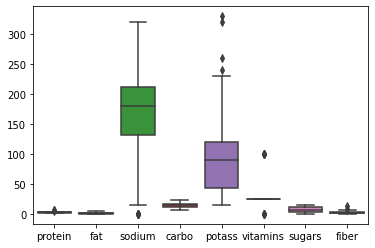

In [10]:
sn.boxplot(data=nutrients)

In [11]:
for column in df[["protein","fat","sodium","carbo","potass","vitamins","sugars","fiber"]]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    Q2 = df[column].median()
    
    df[column] = np.where(df[column]>upper_bound,Q2,df[column])
    df[column] = np.where(df[column]<lower_bound,Q2,df[column])

Q5.Create a table with the 5-number summary of all the numeric attributes after treating noisy values. Do you think the strategy used in dealing with noisy values was effective?

In [12]:
df[["protein","fat","sodium","carbo","potass","vitamins","sugars","fiber"]].describe()

,protein,fat,sodium,carbo,potass,vitamins,sugars,fiber
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000
mean,2.401316,1.013158,181.381579,14.933333,85.821479,25.0,7.040000,1.792105
std,0.875670,1.013159,60.186370,3.737498,48.062504,0.0,4.377031,1.520220
min,1.000000,0.000000,15.000000,7.000000,15.000000,25.0,0.000000,0.000000
25%,2.000000,0.000000,147.500000,12.000000,43.750000,25.0,3.000000,0.750000
50%,2.250000,1.000000,180.000000,14.966667,90.000000,25.0,7.000000,1.625000
75%,3.000000,2.000000,212.500000,17.000000,110.000000,25.0,11.000000,3.000000
max,4.000000,5.000000,320.000000,23.000000,230.000000,25.0,15.000000,6.000000


Yes it was effective as we can see the min and mx values have changed and the outliers have been removed.

Q6. Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [13]:
pd.crosstab(df["type"],df["mfr"])

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


Q7. Which is the cereal with the best rating, worst rating?

In [54]:
df.loc[df["rating"]==df["rating"].max()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-BranwithExtraFiber,K,C,50,4.0,0.0,140.0,1.75,8.0,0.0,90.0,25.0,3,1.0,0.5,93.704912


In [15]:
df.loc[df["rating"]==df["rating"].min()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
9,CapnCrunch,Q,C,120,1.0,2.0,220.0,0.0,12.0,12.0,35.0,25.0,2,1.0,0.75,18.042851


Q8. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.

<AxesSubplot:xlabel='type', ylabel='rating'>

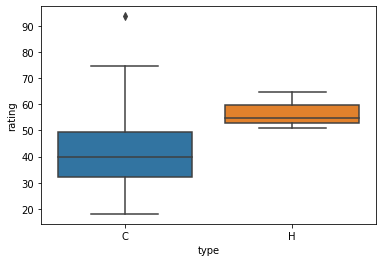

In [16]:
sn.boxplot(data=df,x="type",y="rating")

Q9. Is there a relation between sugars, calories, carbs, and fat?

,sugars,carbo,fat,calories
sugars,1.000000,-0.501086,0.300664,0.574182
carbo,-0.501086,1.000000,-0.311619,0.207331
fat,0.300664,-0.311619,1.000000,0.510630
calories,0.574182,0.207331,0.510630,1.000000


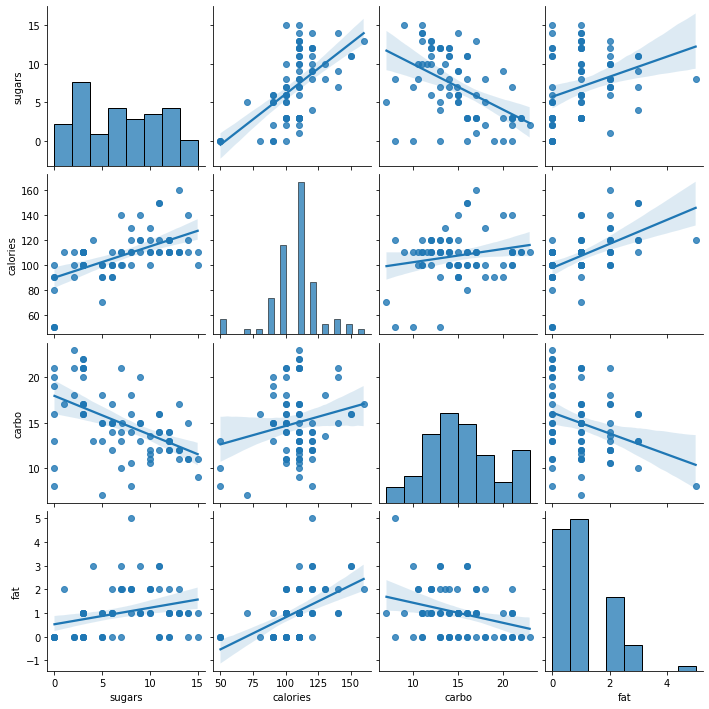

In [17]:
sn.pairplot(df,kind='reg',vars=["sugars","calories","carbo","fat"])
df[["sugars","carbo","fat","calories"]].corr()

Q10. Which manufacturers produce cereal with highest calories?

In [18]:
df["mfr"].loc[df["calories"]==df["calories"].max()]


45    K
Name: mfr, dtype: object

Q11. Use correlation tests and visualization to identify if the two variables calories and consumer rating associated?

-0.6743360496799726

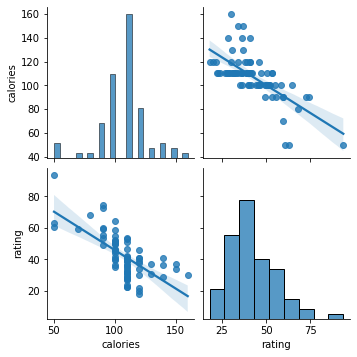

In [55]:
sn.pairplot(df,kind='reg',vars=['calories','rating'])
df["calories"].corr(df["rating"])

Q12. Use correlation tests and visualization to identify if the two variables shelf and calories associated?

0.1250085852775355

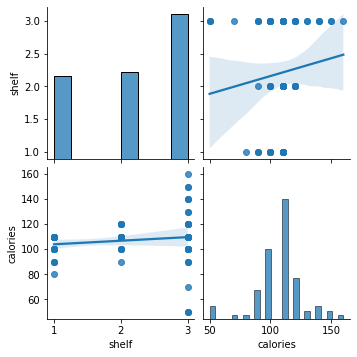

In [56]:
sn.pairplot(df,kind='reg',vars=['shelf','calories'])
df["shelf"].corr(df["calories"])

Q13. Is there a relation between manufacturer and rating?

<AxesSubplot:xlabel='mfr', ylabel='rating'>

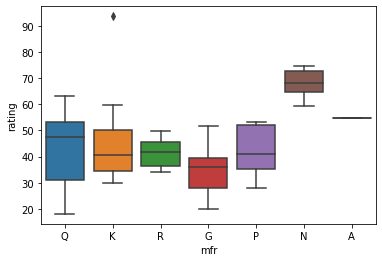

In [23]:
sn.boxplot(data=df,x='mfr',y='rating')

Q14. Which nutrients are essential for a good rating for a cereal?

In [58]:
df.loc[df['rating']>=60]
#Assuming a rating of 60+ to be be a good rating. The following is the analysis on that basis.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-BranwithExtraFiber,K,C,50,4.0,0.0,140.0,1.75,8.0,0.0,90.000000,25.0,3,1.00,0.50,93.704912
19,CreamofWheatQuick,N,H,100,3.0,0.0,80.0,1.00,21.0,0.0,96.216216,25.0,2,1.00,1.00,64.533816
53,PuffedRice,Q,C,50,1.0,0.0,180.0,0.00,13.0,0.0,15.000000,25.0,3,0.50,1.00,60.756112
54,PuffedWheat,Q,C,50,2.0,0.0,180.0,1.00,10.0,0.0,50.000000,25.0,3,0.50,1.00,63.005645
62,ShreddedWheat,N,C,80,2.0,0.0,180.0,3.00,16.0,0.0,95.000000,25.0,1,0.83,1.00,68.235885
63,ShreddedWheatnBran,N,C,90,3.0,0.0,180.0,4.00,19.0,0.0,140.000000,25.0,1,1.00,0.67,74.472949
64,ShreddedWheatspoonsize,N,C,90,3.0,0.0,180.0,3.00,20.0,0.0,120.000000,25.0,1,1.00,0.67,72.801787


In [46]:
nut=df[["protein","fat","sodium","carbo","potass","vitamins","sugars","fiber"]].loc[df['rating']>60]

<AxesSubplot:>

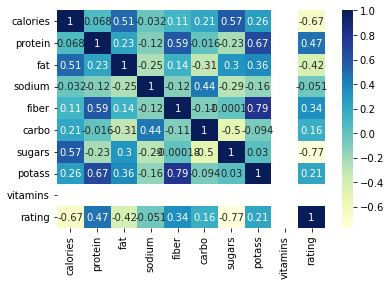

In [59]:
sn.heatmap(df[[ 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins','rating']].corr(), annot = True, cmap="YlGnBu")

In [ ]:
#This means that lesser the sugar and fat, more the rating.